# San Francisco incident analysis

We provide some visualizations regarding incidents that took place in San Francisco during the summer of 2014.
Data are contained within a privided csv file.

We will use common Python librairies such as Pandas (for extracting and processing data) and matplotlib and seaborn to generate visual representations.

The outline if this study is pretty simple:
1. What ? : what do we call incidents and in which categories are these classified?
2. When ? : when do incidents happen during the week and at what time of the day?
3. Where ? : in which neighborhoods incidents are more likely to be reported?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

We start by importing the data file and examine it structure.

In [2]:
data_sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [61]:
data_sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Xok,Yok,event,Hour
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,-122.405647,37.738322,1,23
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,-122.435012,37.761768,1,23
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244,-122.409795,37.780036,1,23
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244,-122.485263,37.772518,1,23
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000,-122.509895,37.772313,1,23


# 1. What ?

28993 incidents were reported in San Francisco during the summer of 2014.

In [4]:
len(data_sf.index)

28993

There are 34 Categories of incidents and 368 descriptions

In [5]:
len(data_sf['Category'].value_counts().index)

34

In [6]:
len(data_sf['Descript'].value_counts().index)

368

There are all kinds of categories, most of which diplay very few events.

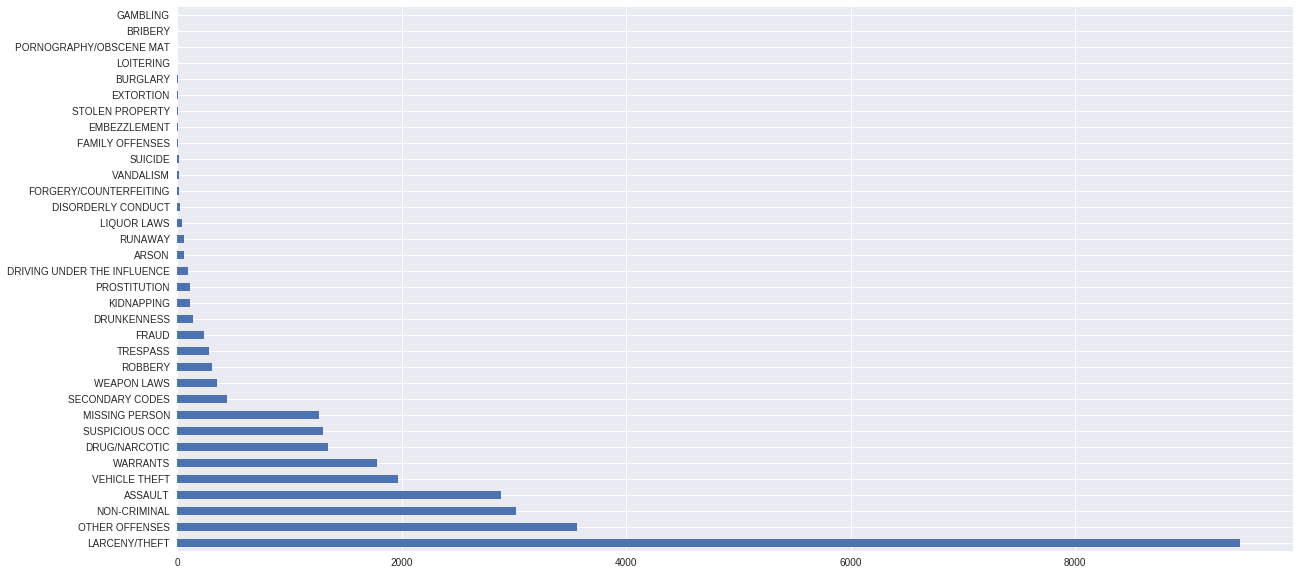

In [7]:
data_sf['Category'].value_counts().plot(kind='barh', figsize=(20,10))

By far 'Larceny/theft' outweighs other categories, it is followed by a loosely defined 'Other offenses' category. Let's take a closer look at the the top 10 categories, and then let's look inside 'Larceny/Theft' and 'Other Offenses'.

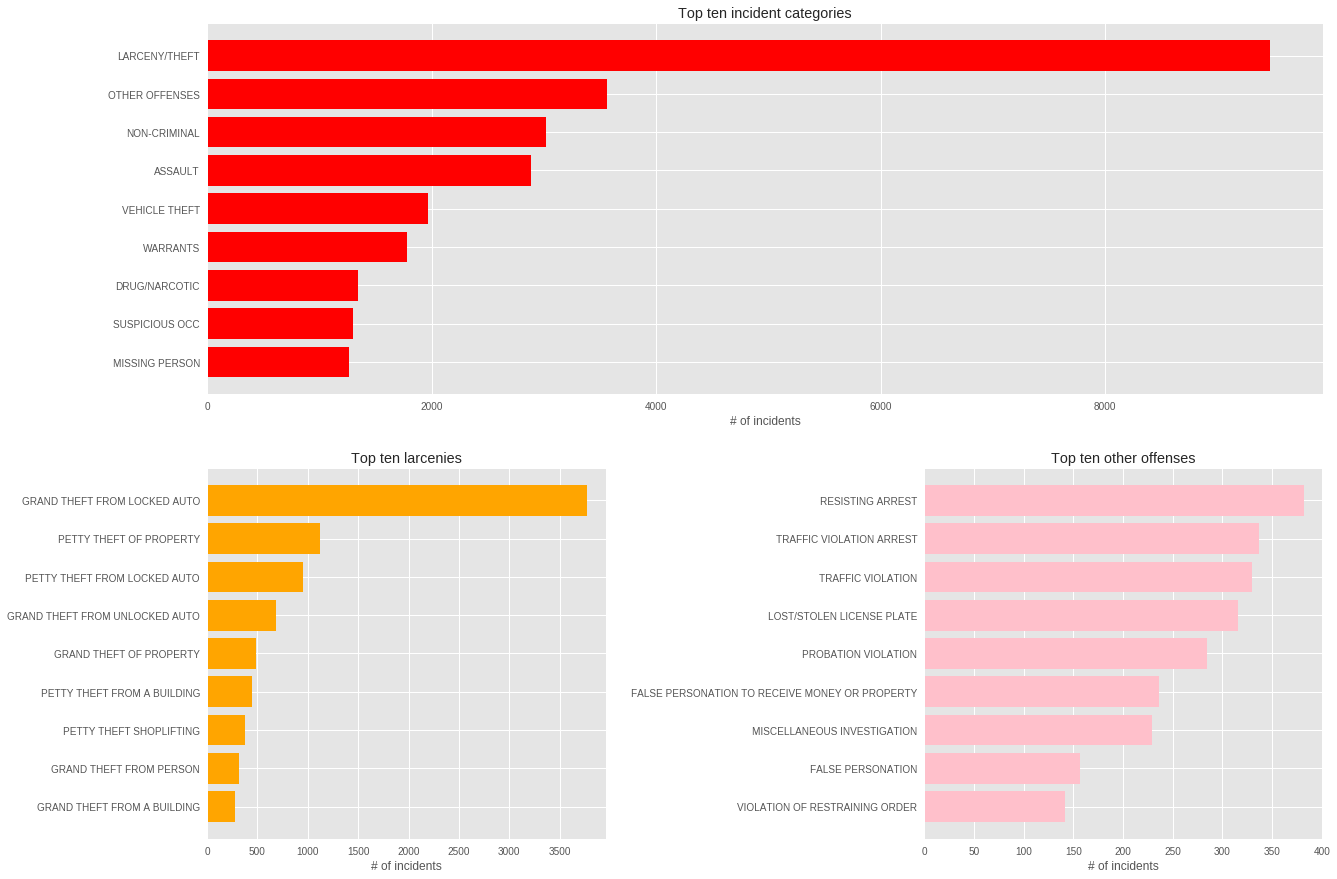

In [146]:
fig = plt.figure()



#plt.tight_layout()

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols = 3, figsize=(20,15))

ax0 = plt.subplot(211)
ax1 = plt.subplot(223)
ax2 = plt.subplot(224)

incident_categories = data_sf['Category'].value_counts()[0:9]

categ_pos = np.arange(len(incident_categories.index))
ax0.barh(categ_pos, incident_categories.values, align='center', color='red')
ax0.set_yticks(categ_pos)
ax0.set_yticklabels(incident_categories.index)
ax0.invert_yaxis()
ax0.set_xlabel('# of incidents')
ax0.set_title('Top ten incident categories')

larcenies = data_sf[data_sf['Category']=='LARCENY/THEFT']['Descript'].value_counts()[0:9]

larcenies_pos = np.arange(len(larcenies.index))
ax1.barh(categ_pos, larcenies.values, align='center', color='orange')
ax1.set_yticks(larcenies_pos)
ax1.set_yticklabels(larcenies.index)
ax1.invert_yaxis()
ax1.set_xlabel('# of incidents')
ax1.set_title('Top ten larcenies')

other = data_sf[data_sf['Category']=='OTHER OFFENSES']['Descript'].value_counts()[0:9]

other_pos = np.arange(len(other.index))
ax2.barh(other_pos, other.values, align='center', color='pink')
ax2.set_yticks(other_pos)
ax2.set_yticklabels(other.index)
ax2.invert_yaxis()
ax2.set_xlabel('# of incidents')
ax2.set_title('Top ten other offenses')

plt.subplots_adjust(wspace=0.8)

plt.show()

Most reported incident from 'Larceny/theft' is cars  being stolen, far ahead of all other larcenies. Other offenses are for a large part traffic violations, but the most frequent is 'Resisting arrest' : don't mess with the police!

# 2. When ?

Incidents occur the whole week round, with a small increase on Friday and during week-ends. 

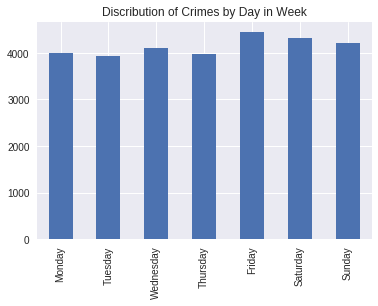

In [55]:
day_of_week=data_sf['DayOfWeek'].value_counts()
day_of_week=day_of_week.reindex(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# Make the DataFrame or Series conform to the new index order
fig,ax=plt.subplots()
day_of_week.plot(kind='bar',ax=ax,title='Discribution of Crimes by Day in Week')

If we now count events as function of the time of the day (regardless of the day in the week), we find that even criminals need to rest at night, during which the number of incidents is much lower than during the day.

The original data display sharp peaks at midnight and at noon. These are obviously artefacts: when no time is registered, the system that produced the data (or the police officer on duty) probably entered a default time which is either noon or midnight. These artefacts appear in grey in the figure below and should not be considered as is to study the frequency of incidents as function of time of the day.

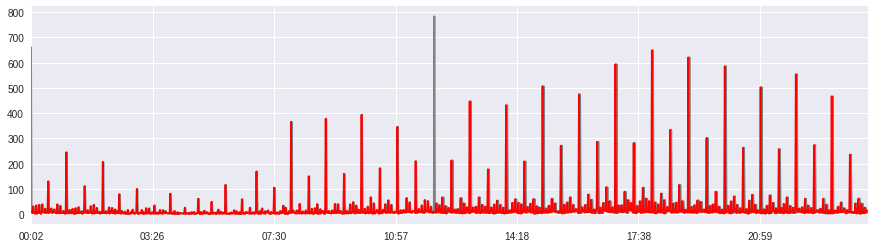

In [56]:
data_wo_bogus_times = data_sf[(data_sf['Time']!='12:00') & (data_sf['Time']!='00:01')]['Time']
data_sf['Time'].value_counts().sort_index().plot(figsize=(15,4),color='gray')
data_wo_bogus_times.value_counts().sort_index().plot(figsize=(15,4),color='red')

Another nice way is to make use of the pandas dataframe in a SQL-like way. We create a dummy column 'event' (which will be used to count events), as well as an 'Hour' column, where existing 'Time' is rounded off to the nearest hour:

In [172]:
data_sf['event']=1 #1 event per row of the data file
data_sf['Hour'] = pd.to_datetime(data_sf.Time).dt.hour #round time to nearest hour

hourly_events = data_sf[['Hour','event']]
hourly_events.head()

,Hour,event
0,23,1
1,23,1
2,23,1
3,23,1
4,23,1


Now we counts events, and we group by hour:

In [177]:
hourly_events = data_sf[['Hour','event']].groupby(['Hour']).count()
hourly_events.head()

,event
Hour,
0,1381
1,821
2,654
3,413
4,245


We'll need the index values for plotting:

In [180]:
hourly_events = data_sf[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.head()

,Hour,event
0,0,1381
1,1,821
2,2,654
3,3,413
4,4,245


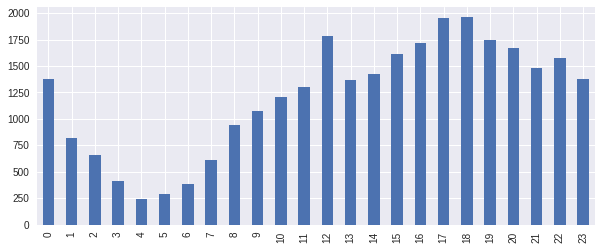

In [183]:
hourly_events['event'].plot(kind='bar', figsize=(10, 4))

We can display more specific plots for one catergory of incident:

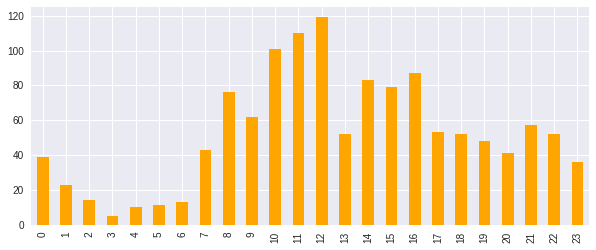

In [190]:
hourly_events_bycat = data_sf[data_sf['Category']=='MISSING PERSON'][['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events_bycat['event'].plot(kind='bar', figsize=(10, 4), color = 'orange')

Combining previous figures, we find most incidents occur at 5-6 pm (except on Mondays, criminals need to rest from their busy weekend...). Nights are usually quieter, with a slight 1-2 hour shift on weekends.   

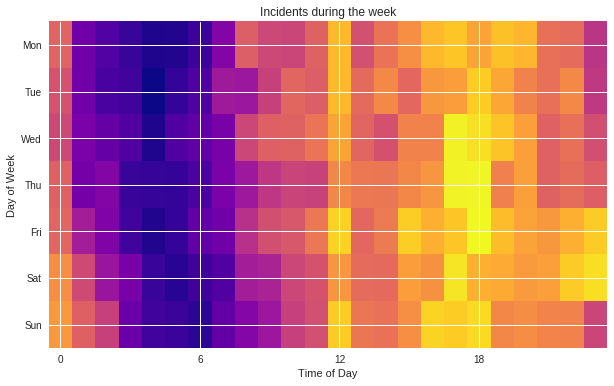

In [145]:
dow = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
data_sf['DOW'] = data_sf.DayOfWeek.map(dow) #map digits to days of the week

plt.figure(1,figsize=(10,6))
plt.hist2d(
    data_sf.Hour.values,
    data_sf.DOW.values,
    bins=[24,7],
    range=[[-0.5,23.5],[-0.5,6.5]],
    cmap='plasma')
plt.xticks(np.arange(0,24,6))
plt.xlabel('Time of Day')
plt.yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Day of Week')
plt.gca().invert_yaxis()
plt.title('Incidents during the week')


This general pattern is found in very common incidents such as Larceny/theft, but other less frequent incidents such as prostitution or suicide follow more specific patterns.

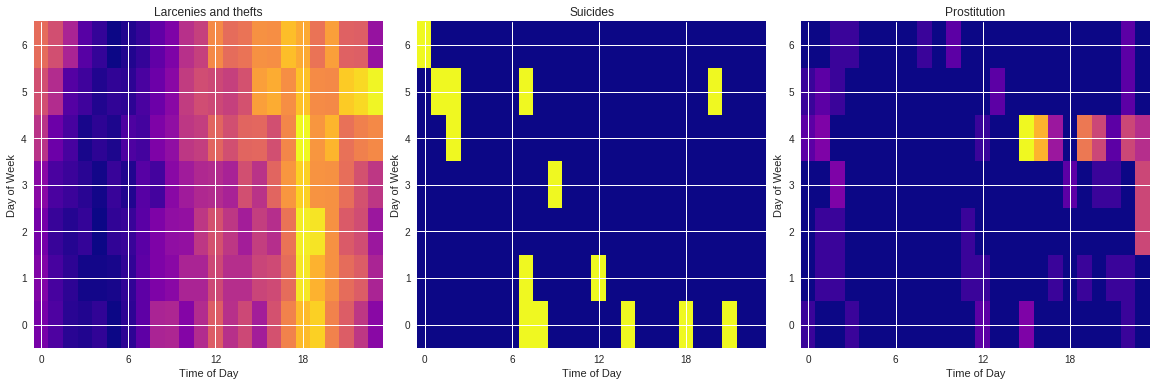

In [120]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols = 3, figsize=(20,6))
    
ax0 = plt.subplot(131)    
ax0.set_title('Larcenies and thefts')
ax0.set_xticks(np.arange(0,24,6))
ax0.set_xlabel('Time of Day')
ax0.set_yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax0.set_ylabel('Day of Week')

#plt.figure(1,figsize=(6,4))
ax0.hist2d(
    data_sf[data_sf['Category']=='LARCENY/THEFT'].Hour.values,
    data_sf[data_sf['Category']=='LARCENY/THEFT'].DOW.values,
    bins=[24,7],
    range=[[-0.5,23.5],[-0.5,6.5]],
    cmap='plasma')

ax1 = plt.subplot(132)
ax1.set_title('Suicides')
ax1.set_xticks(np.arange(0,24,6))
ax1.set_xlabel('Time of Day')
ax1.set_yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax1.set_ylabel('Day of Week')

ax1.hist2d(
    data_sf[data_sf['Category']=='SUICIDE'].Hour.values,
    data_sf[data_sf['Category']=='SUICIDE'].DOW.values,
    bins=[24,7],
    range=[[-0.5,23.5],[-0.5,6.5]],
    cmap='plasma')

ax2 = plt.subplot(133)
ax2.set_title('Prostitution')
ax2.set_xticks(np.arange(0,24,6))
ax2.set_xlabel('Time of Day')
ax2.set_yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax2.set_ylabel('Day of Week')

ax2.hist2d(
    data_sf[data_sf['Category']=='PROSTITUTION'].Hour.values,
    data_sf[data_sf['Category']=='PROSTITUTION'].DOW.values,
    bins=[24,7],
    range=[[-0.5,23.5],[-0.5,6.5]],
    cmap='plasma')

plt.subplots_adjust(wspace=0.1)

plt.show()

# 3. Where?

Southern is the neighborhood which reports more incidents than opther parts of SF.

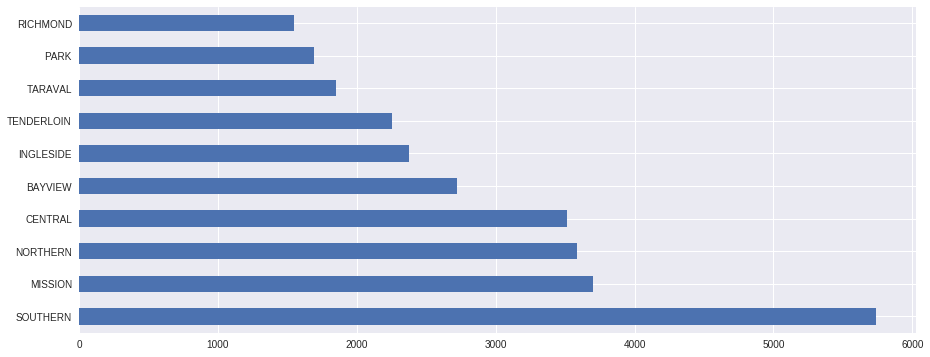

In [144]:
data_sf['PdDistrict'].value_counts().plot(kind='barh', figsize=(15,6))

The map below shows geographical distribution of reported incidents. Robberies (bluish contour lines) superimpose with global incidents (orange-red). Missing people (in blue) are reported in a wider variety of neighborhoods.

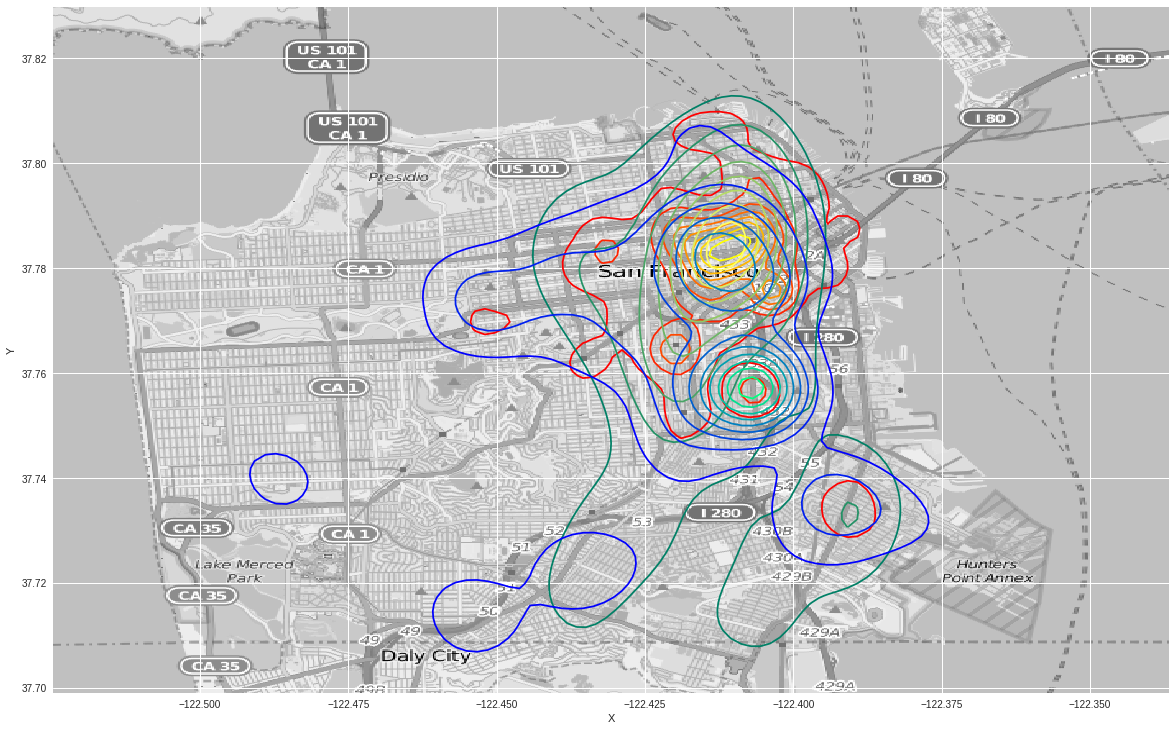

In [146]:
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]
#data_sf['Xok'] = data_sf.X#[data_sf.X<-121].X
#data_sf['Yok'] = data_sf.Y#[data_sf.Y<40].Y

data_sf = data_sf.dropna()
data_sf_bycat = data_sf[data_sf.Category == 'ROBBERY']
data_sf_missing = data_sf[data_sf.Category == 'MISSING PERSON']


plt.figure(figsize=(20,20*asp))
ax = sns.kdeplot(data_sf.X, data_sf.Y, clip=clipsize, aspect=1/asp, cmap = 'autumn')
ax = sns.kdeplot(data_sf_bycat.X, data_sf_bycat.Y, clip=clipsize, aspect=1/asp, cmap='summer')
ax = sns.kdeplot(data_sf_missing.X, data_sf_missing.Y, clip=clipsize, aspect=1/asp, cmap='winter')

ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)

The majority of reported incidents have no resolution

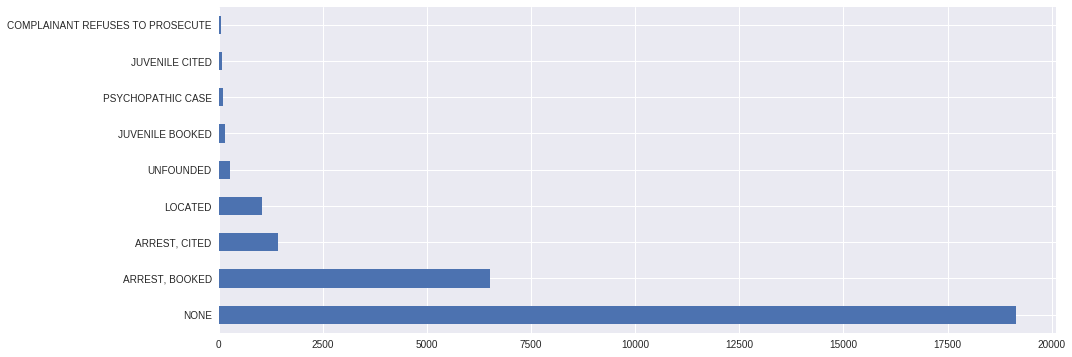

In [148]:
data_sf['Resolution'].value_counts()[0:9].plot(kind='barh', figsize=(15,6))